In [79]:
#--------Import packages
#--------For Netcdf manipulation
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

# SAM x SIV

In [80]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_abs.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [81]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')

In [82]:
sam_df = sam_df.drop(["Years", "Months"], axis=1)

In [83]:
# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [84]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["Volume"] = vol_df["volume"]

# calculate cross correlation


In [85]:
import numpy as np
import statsmodels.api as sm
## SAM and SIV ##
sm.tsa.stattools.ccf(df_new.SAM, df_new.Volume, adjusted=False)

array([-1.30298528e-01,  5.79118077e-03,  6.81904206e-02,  8.59712559e-02,
        4.19392755e-02,  1.19781340e-01,  5.53380177e-02,  1.16640460e-01,
        1.25471090e-01,  6.24726197e-02, -6.85351603e-02, -1.79689883e-02,
        7.05912070e-03,  1.86528223e-01, -2.89663273e-03,  9.91339244e-03,
        1.25401653e-02,  6.52461799e-02,  6.72427497e-02,  1.37313237e-01,
        9.24721739e-02, -2.99579932e-02,  2.02791651e-02,  8.63819767e-02,
        2.44167313e-01,  1.86227528e-01,  2.17791093e-01, -3.51069198e-02,
       -1.13138135e-01, -9.90475166e-03,  1.33867380e-01,  9.85473324e-02,
        8.01678160e-02, -4.42774240e-02,  5.30429202e-03, -9.98130133e-02,
        1.15607861e-01,  1.99231521e-01,  4.12694427e-02, -1.67676869e-02,
       -1.19140559e-01, -2.30061765e-02, -2.01528266e-02,  1.02879801e-01,
        6.66517531e-02, -1.23865552e-01, -1.53729168e-01, -1.68390810e-02,
       -1.92223100e-02,  7.64215487e-02, -6.89141405e-02, -5.25253642e-03,
       -7.35128211e-02, -

In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SAM     97 non-null     float64       
 2   Volume  97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [87]:
# make a dataframe just for volume
df_vol = df_new[['Dates','Volume']]
df_vol['Dates'] = dates_df['Dates'].dt.to_period('M')
df_vol = df_vol.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10480/3839699847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol['Dates'] = dates_df['Dates'].dt.to_period('M')


In [88]:
# make a dataframe just for SAM
df_sam = df_new[['Dates','SAM']]
df_sam['Dates'] = dates_df['Dates'].dt.to_period('M')
df_sam = df_sam.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10480/2807624462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam['Dates'] = dates_df['Dates'].dt.to_period('M')


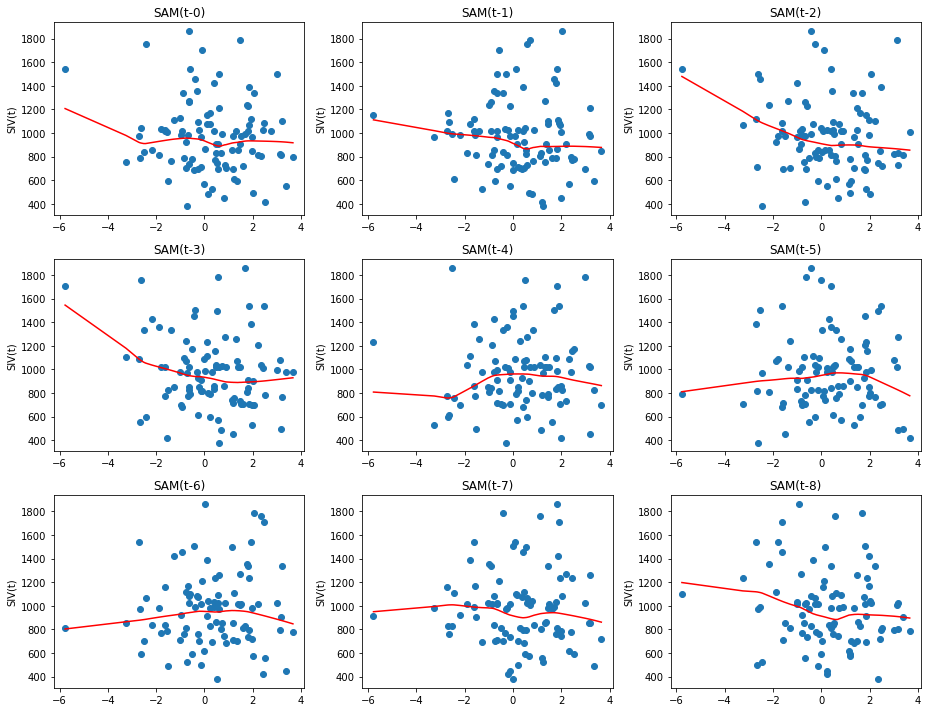

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_sam.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_sam.shift(lag), df_vol)
        axes[row, col].set_title(f"SAM(t-{lag})")
        axes[row, col].set_ylabel("SIV(t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
#plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/ABS_ccf_SAM.png", dpi=300)

In [90]:
df_new

,Dates,SAM,Volume
0,2007-05-01,-1.02,1123.249095
1,2008-05-01,-0.66,739.475298
2,2009-05-01,-0.14,968.900120
3,2010-05-01,1.51,973.981453
4,2011-05-01,1.37,854.359283
...,...,...,...
92,2014-10-01,1.32,1017.586997
93,2015-10-01,-0.66,1271.630218
94,2016-10-01,-0.89,1336.782919
95,2017-10-01,-0.64,1258.799548


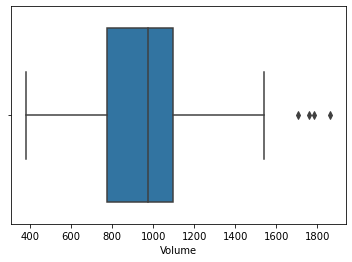

In [91]:
## Removing Outliers
sns.boxplot(x=df_new['Volume'])
plt.show()

In [92]:
df_new['Volume'].describe()

count      97.000000
mean      972.859737
std       307.341230
min       379.241320
25%       772.603533
50%       973.981453
75%      1097.663107
max      1862.541384
Name: Volume, dtype: float64

In [93]:
df_new['Volume'].quantile(0.25)

772.603533

In [94]:
df_new['Volume'].quantile(0.75)

1097.663107

In [95]:
Q1 = df_new['Volume'].quantile(0.25)
Q3 = df_new['Volume'].quantile(0.75)
IQR = Q3 - Q1

In [96]:
IQR

325.0595740000001

In [97]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [98]:
lower_lim

285.0141719999998

In [99]:
upper_lim

1585.2524680000001

In [100]:
outliers_15_low = (df_new['Volume'] < lower_lim)
outliers_15_up = (df_new['Volume'] > upper_lim)

In [101]:
len(df_new['Volume']) - (len(df_new['Volume'][outliers_15_low]) + len(df_new['Volume'][outliers_15_up]))

93

In [102]:
df_new['Volume'][(outliers_15_low | outliers_15_up)]

17    1862.541384
22    1785.599412
53    1757.119415
83    1705.994138
Name: Volume, dtype: float64

In [103]:
df_new['Volume'][~(outliers_15_low | outliers_15_up)]

0     1123.249095
1      739.475298
2      968.900120
3      973.981453
4      854.359283
         ...     
92    1017.586997
93    1271.630218
94    1336.782919
95    1258.799548
96    1019.990329
Name: Volume, Length: 93, dtype: float64

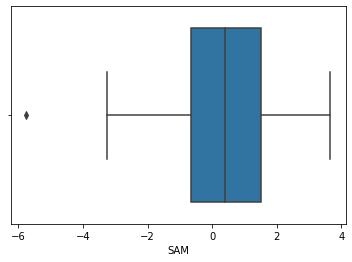

In [104]:
sns.boxplot(x=df_new['SAM'])
plt.show()

In [105]:
Q1P = df_new['SAM'].quantile(0.25)
Q3P = df_new['SAM'].quantile(0.75)
IQRP = Q3P - Q1P

In [106]:
lower_limP = Q1P - 1.5 * IQRP
upper_limP = Q3P + 1.5 * IQRP

In [107]:
outliers_15_lowP = (df_new['SAM'] < lower_limP)
outliers_15_upP = (df_new['SAM'] > upper_limP)

In [108]:
len(df_new['SAM']) - (len(df_new['SAM'][outliers_15_lowP]) + len(df_new['SAM'][outliers_15_upP]))

96

In [109]:
df_new['SAM'][(outliers_15_lowP | outliers_15_upP)]

80   -5.77
Name: SAM, dtype: float64

In [110]:
## CSVs

In [111]:
# df_new

,Dates,SAM,Volume
0,2007-05-01,-1.02,1123.249095
1,2008-05-01,-0.66,739.475298
2,2009-05-01,-0.14,968.900120
3,2010-05-01,1.51,973.981453
4,2011-05-01,1.37,854.359283
...,...,...,...
92,2014-10-01,1.32,1017.586997
93,2015-10-01,-0.66,1271.630218
94,2016-10-01,-0.89,1336.782919
95,2017-10-01,-0.64,1258.799548


In [112]:
df_new = df_new.drop(index=[17, 22, 53, 83,80])

In [113]:
df_new

,Dates,SAM,Volume
0,2007-05-01,-1.02,1123.249095
1,2008-05-01,-0.66,739.475298
2,2009-05-01,-0.14,968.900120
3,2010-05-01,1.51,973.981453
4,2011-05-01,1.37,854.359283
...,...,...,...
92,2014-10-01,1.32,1017.586997
93,2015-10-01,-0.66,1271.630218
94,2016-10-01,-0.89,1336.782919
95,2017-10-01,-0.64,1258.799548


In [114]:
ABS_ccf_SIV_SAM = pd.DataFrame(df_new)

In [115]:
ABS_ccf_SIV_SAM.to_csv("/Users/fridaperez/Desktop/ABS_ccf_SIV_SAM_noo.csv")

In [116]:
table = pd.read_csv('/Users/fridaperez/Desktop/ABS_ccf_SIV_SAM_noo.csv', parse_dates=['Dates'])

In [145]:
table

,Unnamed: 0,Dates,SAM,Volume
0,0,2007-05-01,-1.02,1123.249095
1,1,2008-05-01,-0.66,739.475298
2,2,2009-05-01,-0.14,968.900120
3,3,2010-05-01,1.51,973.981453
4,4,2011-05-01,1.37,854.359283
...,...,...,...,...
87,92,2014-10-01,1.32,1017.586997
88,93,2015-10-01,-0.66,1271.630218
89,94,2016-10-01,-0.89,1336.782919
90,95,2017-10-01,-0.64,1258.799548


In [152]:
sm.tsa.stattools.ccf(table.Volume, table.SAM, adjusted=False)

array([-0.00726388, -0.13400935, -0.19753398, -0.07458533,  0.00837937,
        0.01439391, -0.0530694 , -0.1629947 , -0.17253362, -0.13880974,
        0.02433462, -0.136566  , -0.12112622, -0.10862973, -0.10723183,
       -0.07091904, -0.08651529, -0.1874601 , -0.22671517, -0.14372169,
       -0.08483211, -0.04415166, -0.07824337, -0.12322266, -0.20856196,
       -0.03969628,  0.07461611,  0.02554726,  0.02070935, -0.11414765,
       -0.20983345,  0.02207434,  0.09128179,  0.19702196,  0.07826633,
       -0.12387438, -0.15747011, -0.04835284,  0.10653337,  0.21764282,
        0.04933296, -0.04938219, -0.11148879,  0.04443741,  0.09981888,
        0.14289745,  0.06840329,  0.05027655, -0.04426355,  0.07640742,
       -0.03297883,  0.09444119,  0.09506514,  0.17425706,  0.12055038,
        0.02973034, -0.08276329, -0.01889793,  0.03444325,  0.15247263,
        0.11751955, -0.04741177, -0.01504196, -0.06688028,  0.04892975,
        0.03947532,  0.02127649,  0.0048816 ,  0.01849291, -0.02

In [153]:
# make a dataframe just for SAM
df_sam_noOut = table[['Dates','SAM']]
df_sam_noOut['Dates'] = table['Dates'].dt.to_period('M')
df_sam_noOut = table.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10480/2921267360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam_noOut['Dates'] = table['Dates'].dt.to_period('M')


In [154]:
# make a dataframe just for SAM
df_vol_noOut = table[['Dates','Volume']]
df_vol_noOut['Dates'] = table['Dates'].dt.to_period('M')
df_vol_noOut = table.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10480/3474361425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_noOut['Dates'] = table['Dates'].dt.to_period('M')


In [155]:
df_sam_noOut

,Unnamed: 0,SAM,Volume
Dates,,,
2007-05-01,0,-1.02,1123.249095
2008-05-01,1,-0.66,739.475298
2009-05-01,2,-0.14,968.900120
2010-05-01,3,1.51,973.981453
2011-05-01,4,1.37,854.359283
...,...,...,...
2014-10-01,92,1.32,1017.586997
2015-10-01,93,-0.66,1271.630218
2016-10-01,94,-0.89,1336.782919


In [151]:
df_sam_noOut

,SAM,Volume
Dates,,
2007-05-01,-1.02,1123.249095
2008-05-01,-0.66,739.475298
2009-05-01,-0.14,968.900120
2010-05-01,1.51,973.981453
2011-05-01,1.37,854.359283
...,...,...
2014-10-01,1.32,1017.586997
2015-10-01,-0.66,1271.630218
2016-10-01,-0.89,1336.782919


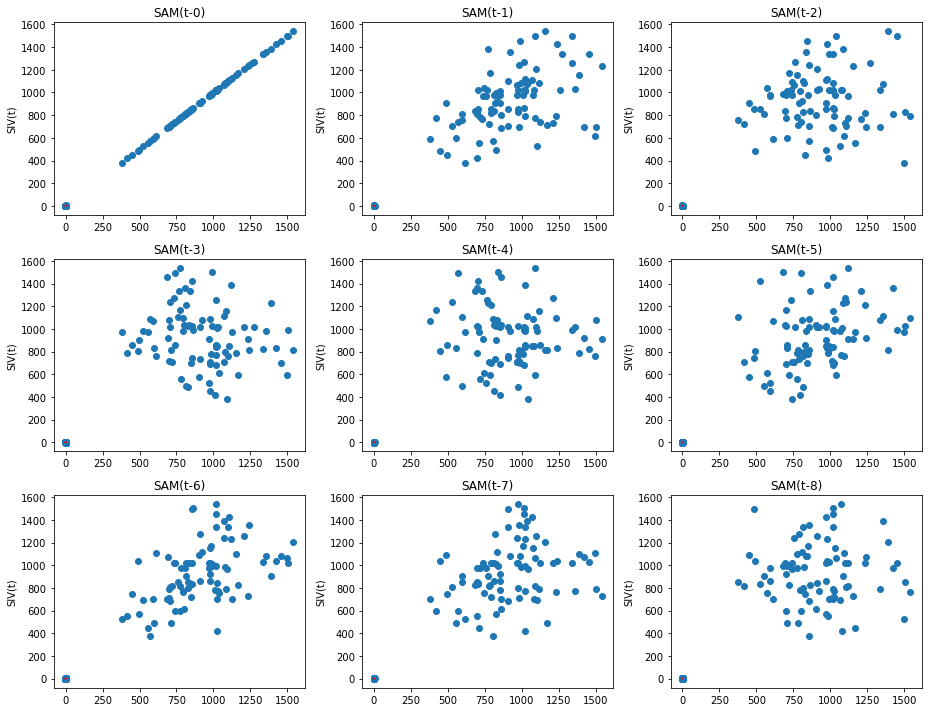

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol_noOut.iloc[:, 0], df_sam_noOut.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_sam_noOut.shift(lag), df_vol_noOut)
        axes[row, col].set_title(f"SAM(t-{lag})")
        axes[row, col].set_ylabel("SIV(t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
#plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/ABS_ccf_SAM_nooutliers.png", dpi=300)

# SOI x SIV

In [123]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [124]:
# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [125]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [126]:
soi_melt

,value,Dates
0,1.0,1866-01-01
1,1.2,1867-01-01
2,-0.2,1868-01-01
3,1.5,1869-01-01
4,-2.3,1870-01-01
...,...,...
1879,-1.1,2018-12-01
1880,1.1,2019-12-01
1881,-0.8,2020-12-01
1882,-0.8,2021-12-01


In [127]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [128]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns = {'SOI':'value'}, inplace = True)

# # Combining the SAM and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["Volume"] = vol_df["volume"]

In [129]:
df_new_soi.reset_index()

,index,Dates,value,Volume
0,0,2007-05-01,0.9,1123.249095
1,1,2008-05-01,1.3,739.475298
2,2,2009-05-01,-0.3,968.900120
3,3,2010-05-01,-0.7,973.981453
4,4,2011-05-01,1.1,854.359283
...,...,...,...,...
92,92,2014-10-01,1.0,1017.586997
93,93,2015-10-01,3.2,1271.630218
94,94,2016-10-01,-0.2,1336.782919
95,95,2017-10-01,-1.2,1258.799548


In [130]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [131]:
df_new_soi

,Dates,SOI,Volume
0,2007-05-01,0.9,1123.249095
1,2008-05-01,1.3,739.475298
2,2009-05-01,-0.3,968.900120
3,2010-05-01,-0.7,973.981453
4,2011-05-01,1.1,854.359283
...,...,...,...
92,2014-10-01,1.0,1017.586997
93,2015-10-01,3.2,1271.630218
94,2016-10-01,-0.2,1336.782919
95,2017-10-01,-1.2,1258.799548


# Calculate cross correlation


In [132]:
import numpy as np
import statsmodels.api as sm
## SOI and SIV ##
sm.tsa.stattools.ccf(df_new_soi.SOI, df_new_soi.Volume, adjusted=False)

array([-0.14277822, -0.17388481, -0.21952214, -0.07294897, -0.00070607,
        0.01725058, -0.099015  , -0.03328829, -0.19434879, -0.05680498,
        0.09864432,  0.06385241, -0.00773397,  0.06952884,  0.00884947,
       -0.18396468,  0.01079925, -0.07818893, -0.05879355, -0.08298303,
       -0.02041237, -0.09352417, -0.0326519 , -0.04099801,  0.05028214,
        0.02817232,  0.0977425 ,  0.149382  ,  0.05414363, -0.03685511,
       -0.05617175,  0.06556579,  0.03791802,  0.2188404 ,  0.25055815,
        0.0765346 , -0.0486607 ,  0.01138651, -0.03662371,  0.08862475,
        0.26783302,  0.27268016,  0.05454077,  0.06095456,  0.01522245,
       -0.00469621,  0.02097526,  0.05838576,  0.02117911, -0.02273393,
        0.03673077,  0.02263572,  0.03915512, -0.06425483, -0.03002088,
       -0.09270054, -0.05828965,  0.03185809,  0.13944318,  0.03688615,
       -0.04153463, -0.0372181 , -0.0029985 , -0.07101595, -0.0026364 ,
        0.00239423, -0.08354537, -0.00137219, -0.00497789,  0.05

In [133]:
df_new_soi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SOI     97 non-null     float64       
 2   Volume  97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [134]:
# make a dataframe just for SAM
df_soi = df_new_soi[['Dates','SOI']]
df_soi['Dates'] = dates_df['Dates'].dt.to_period('M')
df_soi = df_soi.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10480/3364882542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soi['Dates'] = dates_df['Dates'].dt.to_period('M')


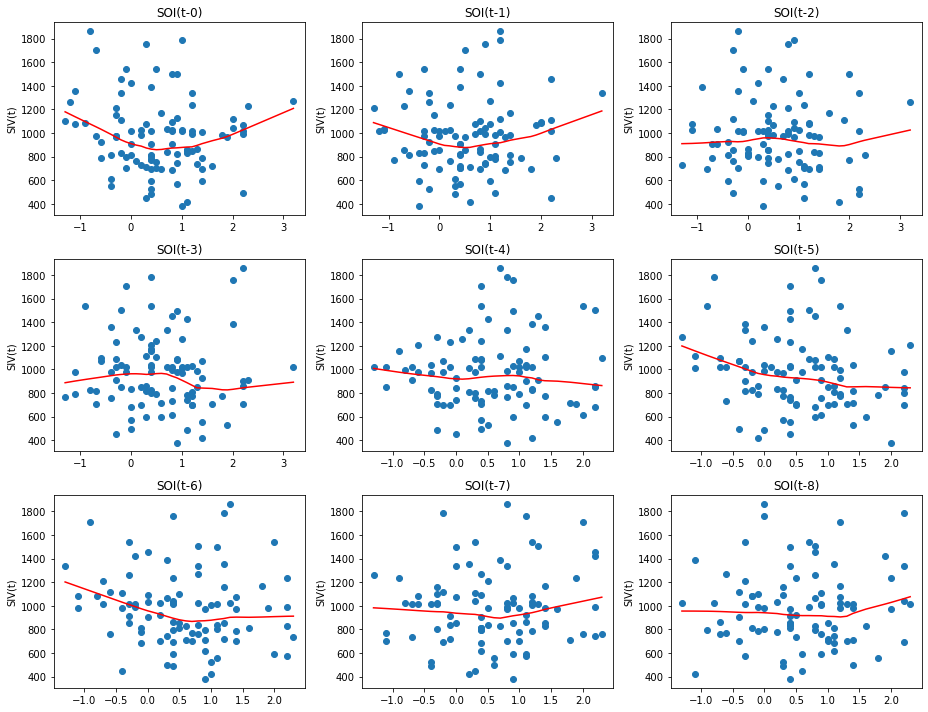

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_soi.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_soi.shift(lag), df_vol)
        axes[row, col].set_title(f"SOI(t-{lag})")
        axes[row, col].set_ylabel("SIV(t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/ABS_ccf_SOI.png", dpi=300)

# ASL x SIV

In [136]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [137]:
asl_df

,Dates,Lon,Lat,ActCenPres,SectorPres,RelCenPres
0,2002-10-01,287.50,-65.75,986.911499,992.61320,-5.701721
1,2002-11-01,210.75,-71.50,988.258850,990.67206,-2.413208
2,2002-12-01,260.00,-67.00,976.395447,982.10020,-5.704773
3,2003-01-01,277.25,-63.00,986.213196,990.83466,-4.621460
4,2003-02-01,270.75,-66.50,976.448608,985.44165,-8.993042
...,...,...,...,...,...,...
227,2021-09-01,243.25,-70.50,962.242188,971.92790,-9.685730
228,2021-10-01,251.25,-69.50,959.429382,973.15680,-13.727417
229,2021-11-01,255.75,-70.00,966.653748,975.75385,-9.100098
230,2021-12-01,253.25,-71.25,968.441101,976.56810,-8.127014


In [138]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
print(asl_df)

         Dates  ActCenPres
0   2002-10-01  986.911499
1   2002-11-01  988.258850
2   2002-12-01  976.395447
3   2003-01-01  986.213196
4   2003-02-01  976.448608
..         ...         ...
227 2021-09-01  962.242188
228 2021-10-01  959.429382
229 2021-11-01  966.653748
230 2021-12-01  968.441101
231 2022-01-01  978.003418

[232 rows x 2 columns]


In [139]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

            ActCenPres
Dates                 
2002-10-01  986.911499
2003-05-01  967.435608
2003-06-01  985.111511
2003-07-01  969.911377
2003-08-01  972.973511
...                ...
2018-06-01  972.353699
2018-07-01  977.746094
2018-08-01  978.081421
2018-09-01  970.656189
2018-10-01  965.293152

[97 rows x 1 columns]


In [140]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

        Dates  ActCenPres
0  2002-10-01  986.911499
1  2003-05-01  967.435608
2  2003-06-01  985.111511
3  2003-07-01  969.911377
4  2003-08-01  972.973511
..        ...         ...
92 2018-06-01  972.353699
93 2018-07-01  977.746094
94 2018-08-01  978.081421
95 2018-09-01  970.656189
96 2018-10-01  965.293152

[97 rows x 2 columns]


In [141]:
# # Combining the SAM and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["Volume"] = vol_df["volume"]
print(df_new_asl)

        Dates  ActCenPres       Volume
0  2002-10-01  986.911499  1123.249095
1  2003-05-01  967.435608   739.475298
2  2003-06-01  985.111511   968.900120
3  2003-07-01  969.911377   973.981453
4  2003-08-01  972.973511   854.359283
..        ...         ...          ...
92 2018-06-01  972.353699  1017.586997
93 2018-07-01  977.746094  1271.630218
94 2018-08-01  978.081421  1336.782919
95 2018-09-01  970.656189  1258.799548
96 2018-10-01  965.293152  1019.990329

[97 rows x 3 columns]


## calculate cross correlation

In [142]:
import numpy as np
import statsmodels.api as sm
## SOI and SIV ##
sm.tsa.stattools.ccf(df_new_asl.ActCenPres, df_new_asl.Volume, adjusted=False)

array([ 9.51147874e-03, -1.55134619e-01, -3.32459219e-02, -3.18334713e-02,
        8.79265137e-02,  2.17682619e-01,  5.73193274e-03, -1.28475484e-01,
       -9.34630042e-02,  1.18678594e-02,  1.15664774e-01,  1.51605576e-01,
        2.02480216e-02, -5.89695529e-02, -7.92557372e-03,  1.46111997e-01,
        2.13777406e-01,  3.80140167e-02, -9.49102501e-02, -2.06264159e-01,
       -1.13192176e-01,  4.02042461e-02,  1.09201211e-01,  7.94866458e-02,
        4.27319741e-03, -1.34483729e-01, -1.82615956e-01, -8.81625352e-02,
        1.00423980e-01,  6.74103140e-02, -1.31197747e-01, -9.41443420e-02,
       -1.06479687e-01, -3.42259654e-03,  1.32235762e-01,  9.24587153e-02,
       -9.02431877e-03, -6.82511333e-02, -1.50453505e-02,  1.16328884e-02,
        9.40657869e-02,  1.45676768e-01,  6.77754014e-02, -5.95440424e-02,
       -4.25762399e-02,  1.81267102e-02,  9.69663783e-02,  1.44244559e-01,
        1.40713208e-02,  2.04864448e-02, -1.36358262e-03,  8.78918774e-02,
        9.11506749e-02,  

In [143]:
# make a dataframe just for ASL
df_asl = df_new_asl[['Dates','ActCenPres']]
df_asl['Dates'] = dates_df['Dates'].dt.to_period('M')
df_asl = df_asl.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10480/703316224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asl['Dates'] = dates_df['Dates'].dt.to_period('M')


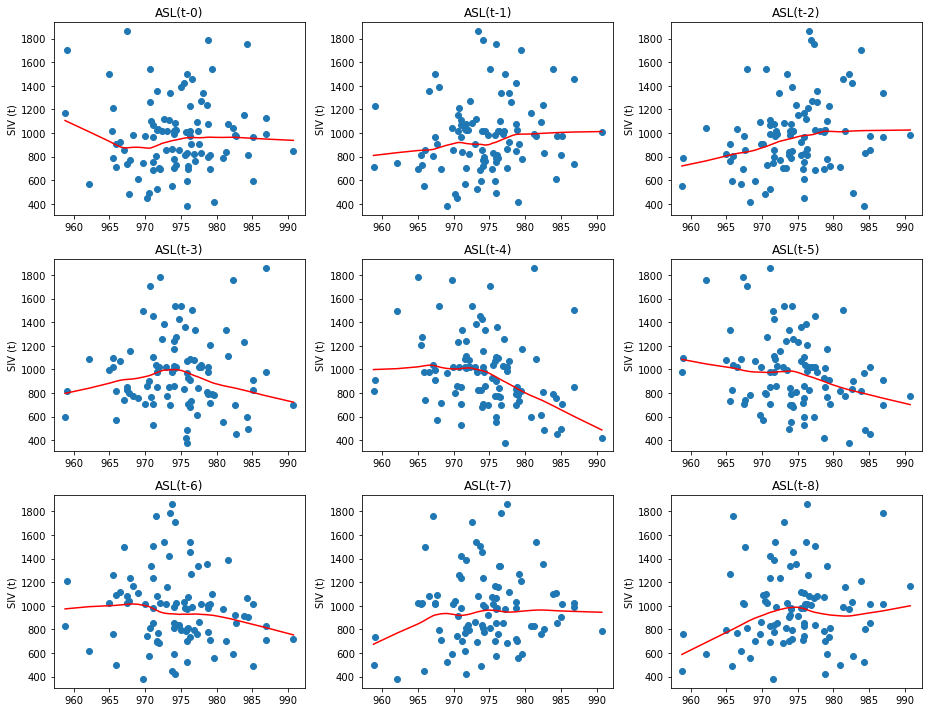

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_asl.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_asl.shift(lag), df_vol)
        axes[row, col].set_title(f"ASL(t-{lag})")
        axes[row, col].set_ylabel("SIV (t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/ABS_ccf_ASL.png", dpi=300)